<a href="https://colab.research.google.com/github/yattishr/credit_card_fraud/blob/master/predict_credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is for the **Self Organising Maps** section of the *Deep Learning A to Z Udemy Course*

Unsupervised Learning Portion

In [0]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# read dataset from local drive
from google.colab import files
import pandas as pd

In [3]:
uploaded = files.upload()

Saving Credit_Card_Applications.csv to Credit_Card_Applications.csv


In [0]:
# import dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values # take all columns excluding the last column
y = dataset.iloc[:, -1].values # take the last column ONLY

In [5]:
# print our dataset
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [0]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)) # set our feature ranges for all columns between 0 (min) & 1 (max)
X = sc.fit_transform(X)

In [7]:
miniSom_upload = files.upload()

Saving minisom.py to minisom.py


In [0]:
# training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

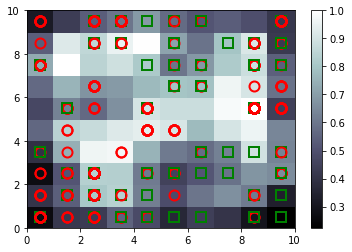

In [9]:
# visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's'] # add markers to the SOM; 0 = circle, s = square
colors = ['r', 'g'] # add color to our markers; r = red, g = green

# loop thru all the rows of the data; i = index of all customerx; x = vectors (each customer observation/row)
for i, x in enumerate(X):
    w = som.winner(x) # get our winning node of customer x
    # plot whether the customer got approval or not, in the middle of the square / node. plot nodes with colors; red or green
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [0]:
# finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,9)]), axis = 0)
frauds = sc.inverse_transform(frauds) # invert our scaling to reveal true values

In [13]:
# print out the frauds
frauds

array([[1.5687688e+07, 0.0000000e+00, 2.1670000e+01, 1.1500000e+01,
        1.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.1000000e+01, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5789611e+07, 0.0000000e+00, 4.7750000e+01, 8.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 7.8750000e+00,
        1.0000000e+00, 1.0000000e+00, 6.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.2610000e+03],
       [1.5649160e+07, 0.0000000e+00, 4.7000000e+01, 1.3000000e+01,
        2.0000000e+00, 3.0000000e+00, 5.0000000e+00, 5.1650000e+00,
        1.0000000e+00, 1.0000000e+00, 9.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5781875e+07, 0.0000000e+00, 2.4750000e+01, 1.2500000e+01,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 1.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.2000000e+01, 1.0000000e+00,
        2.0000000e+00,

Supervised Learning Portion

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [22]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
# units = 6; the average of al linput nodes + the 1 output node
# kernel_initializer = 'uniform'; randomly initialize our weights uniformly & makes sure that our weights are given small values close to zero
# activation = 'relu'; used for all input nodes
# input_dim = 13; the number of nodes in our input layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dropout(p = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(p = 0.1))

# Adding the output layer
# units = 1; there is only one node in our output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  del sys.path[0]


In [23]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)




Epoch 1/100





552/552 [==============================] - 5s 10ms/step - loss: 0.6912 - acc: 0.5598
Epoch 2/100
552/552 [==============================] - 0s 476us/step - loss: 0.6697 - acc: 0.5996
Epoch 3/100
552/552 [==============================] - 0s 542us/step - loss: 0.5866 - acc: 0.8243
Epoch 4/100
552/552 [==============================] - 0s 528us/step - loss: 0.4856 - acc: 0.8478
Epoch 5/100
552/552 [==============================] - 0s 496us/step - loss: 0.4120 - acc: 0.8478
Epoch 6/100
552/552 [==============================] - 0s 456us/step - loss: 0.3767 - acc: 0.8533
Epoch 7/100
552/552 [==============================] - 0s 478us/step - loss: 0.3601 - acc: 0.8551
Epoch 8/100
552/552 [==============================] - 0s 458us/step - loss: 0.3421 - acc: 0.8659
Epoch 9/100
552/552 [==============================] - 0s 476us/step - loss: 0.3326 - acc: 0.8659
Epoch 10/100
552/552 [==============================] - 0s 517us/step - loss: 0.3316 - acc: 0.8678
Epoch 11/100

In [0]:
# Predicting the Test set results
# What is the probability of our Customers commiting credit card fraud
y_pred = classifier.predict(X_test)

In [25]:
# display our y_pred results
y_pred

array([[0.15717143],
       [0.10998121],
       [0.08343428],
       [0.01260504],
       [0.8755127 ],
       [0.00814912],
       [0.01503253],
       [0.9911655 ],
       [0.95807374],
       [0.96415746],
       [0.02118862],
       [0.05777514],
       [0.06408831],
       [0.08237717],
       [0.00856459],
       [0.1416792 ],
       [0.98051536],
       [0.07486242],
       [0.02131179],
       [0.985785  ],
       [0.11890042],
       [0.96392554],
       [0.9860218 ],
       [0.08190215],
       [0.00553218],
       [0.06995606],
       [0.9242122 ],
       [0.46520752],
       [0.08431432],
       [0.97677577],
       [0.89523244],
       [0.9708477 ],
       [0.7244749 ],
       [0.08249456],
       [0.98536885],
       [0.03684014],
       [0.02506143],
       [0.01435208],
       [0.01003635],
       [0.19360253],
       [0.0105938 ],
       [0.13643935],
       [0.16320357],
       [0.9999037 ],
       [0.9826834 ],
       [0.02687916],
       [0.06255779],
       [0.992

In [27]:
# Predict using True / False whether a Customer is likely to commit credit card fraud or not
# Use a threshold of 50% probability
y_pred = (y_pred > 0.85) # if y_pred > 0.5 then prediction is True.
print(y_pred)

[[False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 

In [28]:
# Making the Confusion Matrix
# The number of correct predictions vs the number of incorrect predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# display the confustion matrix
print(cm)

[[67  6]
 [12 53]]


On new data, we get 67 + 53 = 120 correct predictions
and we get 12 + 6 = 18 incorrect predictions